Previously we created a new polynomial feature set and then applied our standard linear regression on it, but we can be smarter about model choice and utilize regularization.

Regularization attempts to minimize the RSS (residual sum of squares) and a penalty factor. This penalty factor will penalize models that have coefficients that are too large. Some methods of regularization will actually cause non useful features to have a coefficient of zero, in which case the model does not consider the feature.

Let's explore two methods of regularization, Ridge Regression and Lasso. We'll combine these with the polynomial feature set (it wouldn't be as effective to perform regularization of a model on such a small original feature set of the original X).

# Importing Libraries

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Dataset

In [357]:
df = pd.read_csv("house_data.csv")

In [358]:
df .head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Analysis

In [359]:
df.describe() #statistical analysis

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [360]:
df.info() # #basic idea that we get from the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [361]:
# using isnull() function to see if any null data is available in the data set 
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Data Processing

## Removing the columns that are not required for the analysis

In [362]:
# Dropping the fields Date, Street, Satezip, country.

df.drop(df.columns[[0, 14,16,17]], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [363]:
df .info() # To find if there is any column that is not int or float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


# Converting categorical variables of the dataset into numerical variables - using ONE HOT ENCODING technique

In [364]:
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [365]:
df['city']=df['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

In [366]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4


Multiple Features (N-Dimensional)

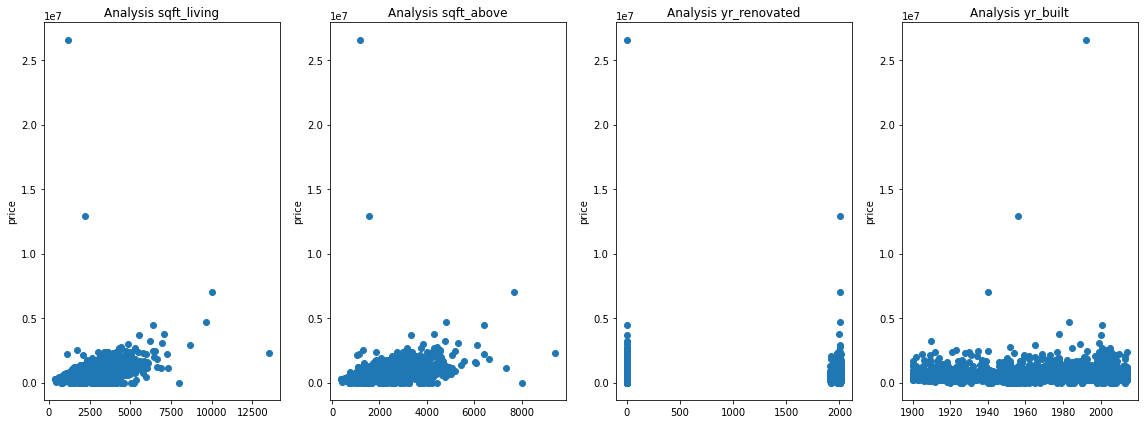

In [367]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].plot(df['sqft_living'],df['price'],'o')
axes[0].set_ylabel("price")
axes[0].set_title("Analysis sqft_living")

axes[1].plot(df['sqft_above'],df['price'],'o')
axes[1].set_ylabel("price")
axes[1].set_title("Analysis sqft_above")

axes[2].plot(df['yr_renovated'],df['price'],'o')
axes[2].set_title("Analysis yr_renovated");
axes[2].set_ylabel("price")

axes[3].plot(df['yr_built'],df['price'],'o')
axes[3].set_ylabel("price")
axes[3].set_title("Analysis yr_built")
plt.tight_layout();

In [368]:
# Relationships between features
# sns.pairplot(df,diag_kind='kde')

# Dividing Dataset into Dependent and Independent columns

In [369]:
X= df.drop('price',axis=1)
y=df['price']

# Polynomial Conversion

In [370]:
from sklearn.preprocessing import PolynomialFeatures

In [371]:
polynomial_converter = PolynomialFeatures(degree=1,include_bias=False)

In [372]:
poly_features = polynomial_converter.fit_transform(X)

# Splitting the dataset into training and testing set

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling the Data

While our particular data set has all the values in the same order of magnitude, typically that won't be the case on a dataset, and since the mathematics behind regularized models will sum coefficients together, its important to standardize the features.

In [375]:
from sklearn.preprocessing import StandardScaler

In [376]:
scaler = StandardScaler()

In [377]:
scaler.fit(X_train)

StandardScaler()

In [378]:
X_train = scaler.transform(X_train)

In [379]:
X_test = scaler.transform(X_test)

# Ridge Regression

In [380]:
from sklearn.linear_model import Ridge

In [381]:
ridge_model = Ridge(alpha=10)

In [382]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [383]:
test_predictions = ridge_model.predict(X_test)

In [384]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [385]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [386]:
print (f"MAE= {MAE}, MSE= {MSE}, RMSE= {RMSE}")

MAE= 165505.68815624694, MSE= 177671452724.8825, RMSE= 421510.9164955073


How did it perform on the training set? (This will be used later on for comparison)

In [387]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

165578.18449180294

Choosing an alpha value with Cross-Validation

In [388]:
from sklearn.linear_model import RidgeCV

In [389]:
# Choosing a scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
# Negative RMSE so all metrics follow convention "Higher is better"

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [390]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [391]:
ridge_cv_model.alpha_

10.0

In [392]:
test_predictions = ridge_cv_model.predict(X_test)

In [393]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [394]:
print (f"MAE= {MAE}, MSE= {MSE}, RMSE= {RMSE}")

MAE= 165505.68815627176, MSE= 177671452724.87537, RMSE= 421510.9164954988


In [395]:
# Training Set Performance

train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

165578.1844918256

In [396]:
#ridge_cv_model.coef_

# Prediction on New Data

In [397]:
cost = {'bedrooms':3.0,'bathrooms':2.00,'sqft_living':1570,'sqft_lot':7500,'floors':2.0,'waterfront':0,'view':4,'condition':5,
          'sqft_above':3560,'sqft_basement':300,'yr_built':1932,'yr_renovated':2007,'city':2}
index=[1]#serial number
my_data=pd.DataFrame(cost,index)

In [398]:
print(my_data)

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1       3.0        2.0         1570      7500     2.0           0     4   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  
1          5        3560            300      1932          2007     2  


In [399]:
 # my_data_polynomial_converter = PolynomialFeatures(degree=1,include_bias=False)

In [400]:
# my_data_features = my_data_polynomial_converter.fit_transform(my_data)

In [401]:
my_data_price= ridge_cv_model.predict(my_data.values)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")

 The predicted price for the given data is :[3.89762825e+08]


# Lasso Regression

In [402]:
from sklearn.linear_model import LassoCV

In [403]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [404]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [405]:
lasso_cv_model.alpha_

23527.52211034554

In [406]:
test_predictions = lasso_cv_model.predict(X_test)

In [407]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [408]:
print (f"MAE= {MAE}, MSE= {MSE}, RMSE= {RMSE}")

MAE= 170762.8199417872, MSE= 184113357947.14636, RMSE= 429084.3249841998


In [409]:
# Training Set Performance
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

174772.25336765384

# Prediction on New Data

In [410]:
cost = {'bedrooms':3.0,'bathrooms':2.00,'sqft_living':1570,'sqft_lot':7500,'floors':2.0,'waterfront':0,'view':4,'condition':5,
          'sqft_above':3560,'sqft_basement':300,'yr_built':1932,'yr_renovated':2007,'city':2}
index=[1]#serial number
my_data=pd.DataFrame(cost,index)


In [411]:
print(my_data)

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1       3.0        2.0         1570      7500     2.0           0     4   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  
1          5        3560            300      1932          2007     2  


In [412]:
my_data_price= lasso_cv_model.predict(my_data.values)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")

 The predicted price for the given data is :[3.21185549e+08]


# Elastic Net

In [413]:
from sklearn.linear_model import ElasticNetCV

In [414]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [415]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [416]:
elastic_model.l1_ratio_

1.0

In [417]:
test_predictions = elastic_model.predict(X_test)

In [418]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [419]:
print (f"MAE= {MAE}, MSE= {MSE}, RMSE= {RMSE}")

MAE= 165406.22412410323, MSE= 177685590573.6399, RMSE= 421527.68660390493


In [420]:
# Training Set Performance
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

165560.48428086957

In [421]:
elastic_model.coef_

array([-41927.53956552,  34240.62469937, 246100.03760473, -14712.68264826,
        13262.36240844,  25455.36157854,  40749.24112084,  29785.60954278,
         3540.1471355 , -22071.40857935, -54325.42122589,      0.        ,
       -39148.24252332])

# Prediction on New Data

In [422]:
cost = {'bedrooms':3.0,'bathrooms':2.00,'sqft_living':1570,'sqft_lot':7500,'floors':2.0,'waterfront':0,'view':4,'condition':5,
          'sqft_above':3560,'sqft_basement':300,'yr_built':1932,'yr_renovated':2007,'city':2}
index=[1]#serial number
my_data=pd.DataFrame(cost,index)

In [423]:
print(my_data)

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1       3.0        2.0         1570      7500     2.0           0     4   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  
1          5        3560            300      1932          2007     2  


In [425]:
my_data_price= elastic_model.predict(my_data.values)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")

 The predicted price for the given data is :[1.77815631e+08]
